# Chapter 11: Time Series

In [1]:
import numpy as np
import pandas as pd

## 11.1: Date and Time Data Types and Tools

In [2]:
from datetime import datetime

In [3]:
now=datetime.now()
now

datetime.datetime(2024, 7, 14, 13, 42, 17, 932622)

In [8]:
now.year,now.month,now.day

(2024, 7, 14)

In [10]:
delta=datetime(2011,1,7)-datetime(2008,6,24,7,15)
delta

datetime.timedelta(days=926, seconds=60300)

In [11]:
delta.days

926

In [12]:
delta.seconds

60300

In [13]:
from datetime import timedelta

In [14]:
start=datetime(2011,1,7)
start

datetime.datetime(2011, 1, 7, 0, 0)

In [15]:
start+timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [16]:
start-2*timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

## Converting Between String and Datetime

In [17]:
stamp=datetime(2011,1,3)
stamp

datetime.datetime(2011, 1, 3, 0, 0)

In [18]:
str(stamp)

'2011-01-03 00:00:00'

In [19]:
stamp.strftime("%Y-%m-%d")

'2011-01-03'

In [20]:
value="2011-01-03"
datetime.strptime(value,"%Y-%m-%d")

datetime.datetime(2011, 1, 3, 0, 0)

In [22]:
datestrs=["7/6/2011","8/6/2011"]
[datetime.strptime(x,"%m/%d/%Y") for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [23]:
datestrs=["2011-07-06 12:00:00","2011-08-06 00:00:00"]
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [25]:
idx=pd.to_datetime(datestrs+[None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [26]:
idx[2]

NaT

In [27]:
pd.isna(idx)

array([False, False,  True])

## 11.2: Time Series Basics

In [28]:
dates=[datetime(2011,1,2),datetime(2011,1,5),
       datetime(2011,1,7),datetime(2011,1,8),
       datetime(2011,1,10),datetime(2011,1,12)]

ts=pd.Series(np.random.standard_normal(6),index=dates)#

ts

2011-01-02    0.707828
2011-01-05    0.028666
2011-01-07   -0.319627
2011-01-08   -1.559473
2011-01-10   -0.243005
2011-01-12   -0.436275
dtype: float64

In [29]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [31]:
ts+ts[::2]

2011-01-02    1.415657
2011-01-05         NaN
2011-01-07   -0.639254
2011-01-08         NaN
2011-01-10   -0.486010
2011-01-12         NaN
dtype: float64

In [32]:
ts.index.dtype

dtype('<M8[ns]')

In [33]:
stamp=ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

### Indexing, Selection, Subsetting

In [34]:
stamp=ts.index[2]
stamp

Timestamp('2011-01-07 00:00:00')

In [35]:
ts[stamp]

-0.3196268484231729

In [36]:
ts["2011-01-10"]

-0.24300504355767744

In [37]:
longer_ts=pd.Series(np.random.standard_normal(1000),index=pd.date_range("2000-01-01",periods=1000))
longer_ts

2000-01-01    1.916388
2000-01-02   -0.777331
2000-01-03   -1.041737
2000-01-04   -0.838403
2000-01-05    1.288521
                ...   
2002-09-22    1.524752
2002-09-23   -0.727768
2002-09-24    0.029983
2002-09-25   -0.308603
2002-09-26   -2.781368
Freq: D, Length: 1000, dtype: float64

In [38]:
longer_ts["2001"]

2001-01-01   -0.538878
2001-01-02   -0.502308
2001-01-03   -0.191763
2001-01-04    0.302867
2001-01-05    1.556756
                ...   
2001-12-27    0.234927
2001-12-28    0.298394
2001-12-29    0.534052
2001-12-30   -0.931783
2001-12-31   -0.221198
Freq: D, Length: 365, dtype: float64

(array([  9.,  32.,  93., 206., 229., 224., 130.,  53.,  17.,   7.]),
 array([-2.9282959 , -2.30432134, -1.68034679, -1.05637223, -0.43239768,
         0.19157688,  0.81555143,  1.43952599,  2.06350054,  2.6874751 ,
         3.31144965]),
 <BarContainer object of 10 artists>)

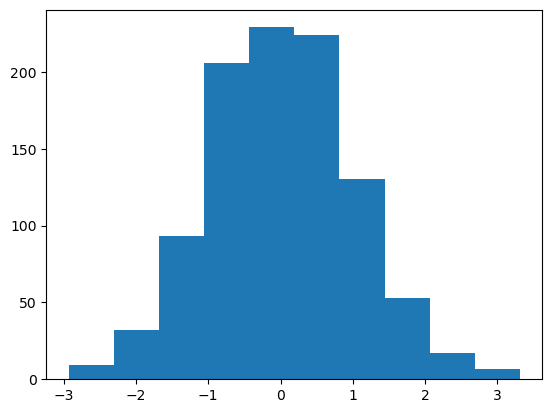

In [39]:
from matplotlib.pyplot import hist


hist(longer_ts)

In [40]:
longer_ts["2001-05"]

2001-05-01    0.883892
2001-05-02    0.463753
2001-05-03    0.849456
2001-05-04    1.089603
2001-05-05    0.701377
2001-05-06    0.541252
2001-05-07    0.333125
2001-05-08   -0.793186
2001-05-09   -0.554411
2001-05-10   -1.847094
2001-05-11    0.982948
2001-05-12   -1.559943
2001-05-13    1.999046
2001-05-14   -0.052748
2001-05-15    0.097451
2001-05-16   -0.122805
2001-05-17    0.642790
2001-05-18   -0.053747
2001-05-19   -1.617064
2001-05-20   -0.210172
2001-05-21    0.167405
2001-05-22    1.062686
2001-05-23   -1.783350
2001-05-24    1.005472
2001-05-25    1.334932
2001-05-26    0.752438
2001-05-27   -0.828949
2001-05-28    0.936010
2001-05-29   -0.548379
2001-05-30    0.132679
2001-05-31   -1.430170
Freq: D, dtype: float64

In [41]:
ts

2011-01-02    0.707828
2011-01-05    0.028666
2011-01-07   -0.319627
2011-01-08   -1.559473
2011-01-10   -0.243005
2011-01-12   -0.436275
dtype: float64

In [42]:
ts[datetime(2011,1,7):]

2011-01-07   -0.319627
2011-01-08   -1.559473
2011-01-10   -0.243005
2011-01-12   -0.436275
dtype: float64

In [43]:
ts[datetime(2011,1,7):datetime(2011,1,10)]

2011-01-07   -0.319627
2011-01-08   -1.559473
2011-01-10   -0.243005
dtype: float64

In [44]:
ts

2011-01-02    0.707828
2011-01-05    0.028666
2011-01-07   -0.319627
2011-01-08   -1.559473
2011-01-10   -0.243005
2011-01-12   -0.436275
dtype: float64

In [47]:
ts["2011-01-06":"2011-01-11"]

2011-01-07   -0.319627
2011-01-08   -1.559473
2011-01-10   -0.243005
dtype: float64

In [50]:
ts.truncate(after="2011-01-09")

2011-01-02    0.707828
2011-01-05    0.028666
2011-01-07   -0.319627
2011-01-08   -1.559473
dtype: float64

In [51]:
dates=pd.date_range("2000-01-01",periods=100,freq="W-WED")
dates

DatetimeIndex(['2000-01-05', '2000-01-12', '2000-01-19', '2000-01-26',
               '2000-02-02', '2000-02-09', '2000-02-16', '2000-02-23',
               '2000-03-01', '2000-03-08', '2000-03-15', '2000-03-22',
               '2000-03-29', '2000-04-05', '2000-04-12', '2000-04-19',
               '2000-04-26', '2000-05-03', '2000-05-10', '2000-05-17',
               '2000-05-24', '2000-05-31', '2000-06-07', '2000-06-14',
               '2000-06-21', '2000-06-28', '2000-07-05', '2000-07-12',
               '2000-07-19', '2000-07-26', '2000-08-02', '2000-08-09',
               '2000-08-16', '2000-08-23', '2000-08-30', '2000-09-06',
               '2000-09-13', '2000-09-20', '2000-09-27', '2000-10-04',
               '2000-10-11', '2000-10-18', '2000-10-25', '2000-11-01',
               '2000-11-08', '2000-11-15', '2000-11-22', '2000-11-29',
               '2000-12-06', '2000-12-13', '2000-12-20', '2000-12-27',
               '2001-01-03', '2001-01-10', '2001-01-17', '2001-01-24',
      

In [52]:
long_df=pd.DataFrame(np.random.standard_normal((100,4)),index=dates,columns=["Colorado","Texas","New York","Ohio"])
long_df

,Colorado,Texas,New York,Ohio
2000-01-05,-3.457144,0.610536,0.560041,-0.839200
2000-01-12,1.294827,1.728222,0.044060,0.419181
2000-01-19,0.825045,-1.155751,-0.316994,0.095850
2000-01-26,-0.325892,-2.243459,0.765933,0.064960
2000-02-02,0.335954,-0.463314,-0.578680,-0.110596
...,...,...,...,...
2001-10-31,-1.365802,1.313420,-0.381204,0.523487
2001-11-07,1.290880,-1.150854,-1.196791,0.414121
2001-11-14,0.421768,0.356210,0.001074,-0.353702
2001-11-21,0.695798,0.024156,-0.675473,-0.527327


In [53]:
long_df.loc["2001-05"]

,Colorado,Texas,New York,Ohio
2001-05-02,-0.469386,-0.128821,-0.478806,-0.377360
2001-05-09,0.529979,1.273107,0.151258,-0.372288
2001-05-16,-1.045829,-0.426611,-0.193588,1.001470
2001-05-23,1.053928,-0.186213,-1.884618,-0.137641
2001-05-30,0.136399,0.097321,1.356460,-0.849686


### Time Series with Duplicate Indices

In [54]:
dates=pd.DatetimeIndex(["2000-01-01","2000-01-02","2000-01-02","2000-01-02","2000-01-03"])
dup_ts=pd.Series(np.arange(5),index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [55]:
dup_ts.index.is_unique

False

In [56]:
dup_ts["2000-01-03"]

4

In [57]:
dup_ts["2000-01-02"]

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [58]:
grouped=dup_ts.groupby(level=0)
list(grouped)

[(Timestamp('2000-01-01 00:00:00'),
  2000-01-01    0
  dtype: int32),
 (Timestamp('2000-01-02 00:00:00'),
  2000-01-02    1
  2000-01-02    2
  2000-01-02    3
  dtype: int32),
 (Timestamp('2000-01-03 00:00:00'),
  2000-01-03    4
  dtype: int32)]

In [59]:
grouped.mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

In [62]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## 11.3: Date Ranges, Frequencies, and Shifting

In [63]:
ts

2011-01-02    0.707828
2011-01-05    0.028666
2011-01-07   -0.319627
2011-01-08   -1.559473
2011-01-10   -0.243005
2011-01-12   -0.436275
dtype: float64

In [64]:
resampler=ts.resample("D")
resampler

In [65]:
list(resampler)

[(Timestamp('2011-01-02 00:00:00'),
  2011-01-02    0.707828
  dtype: float64),
 (Timestamp('2011-01-03 00:00:00'), Series([], dtype: float64)),
 (Timestamp('2011-01-04 00:00:00'), Series([], dtype: float64)),
 (Timestamp('2011-01-05 00:00:00'),
  2011-01-05    0.028666
  dtype: float64),
 (Timestamp('2011-01-06 00:00:00'), Series([], dtype: float64)),
 (Timestamp('2011-01-07 00:00:00'),
  2011-01-07   -0.319627
  dtype: float64),
 (Timestamp('2011-01-08 00:00:00'),
  2011-01-08   -1.559473
  dtype: float64),
 (Timestamp('2011-01-09 00:00:00'), Series([], dtype: float64)),
 (Timestamp('2011-01-10 00:00:00'),
  2011-01-10   -0.243005
  dtype: float64),
 (Timestamp('2011-01-11 00:00:00'), Series([], dtype: float64)),
 (Timestamp('2011-01-12 00:00:00'),
  2011-01-12   -0.436275
  dtype: float64)]

### Generating Date Ranges

In [66]:
index = pd.date_range("2012-04-01", "2012-06-01")
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [67]:
pd.date_range(start="2012-04-01", periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [68]:
pd.date_range(end="2012-06-01", periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [71]:
pd.date_range("2024-01-07", "2024-12-07", freq="BM")

C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_12852\713657161.py:1: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  pd.date_range("2024-01-07", "2024-12-07", freq="BM")


DatetimeIndex(['2024-01-31', '2024-02-29', '2024-03-29', '2024-04-30',
               '2024-05-31', '2024-06-28', '2024-07-31', '2024-08-30',
               '2024-09-30', '2024-10-31', '2024-11-29'],
              dtype='datetime64[ns]', freq='BME')

In [72]:
pd.date_range("2012-05-02 12:56:31", periods=5)


DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [73]:
pd.date_range("2012-05-02 12:56:31", periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and Date Offsets

In [74]:
from pandas.tseries.offsets import Hour,Minute

In [75]:
hour=Hour()

In [76]:
hour

<Hour>

In [77]:
four_hours=Hour(4)
four_hours

<4 * Hours>

In [78]:
pd.date_range("2000-01-01","2000-01-03 23:59",freq="4H")


C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_12852\4288980852.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range("2000-01-01","2000-01-03 23:59",freq="4H")


DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4h')

In [79]:
Hour(2)+Minute(30)

<150 * Minutes>

In [80]:
pd.date_range("2000-01-01",periods=10,freq="1h30min")

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90min')

#### Week of month dates

In [83]:
monthly_dates=pd.date_range("2024-01-01","2024-12-31",freq="WOM-3Fri")
monthly_dates

DatetimeIndex(['2024-01-19', '2024-02-16', '2024-03-15', '2024-04-19',
               '2024-05-17', '2024-06-21', '2024-07-19', '2024-08-16',
               '2024-09-20', '2024-10-18', '2024-11-15', '2024-12-20'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

### Shifting (Leading and Lagging) Data

In [84]:
ts=pd.Series(np.random.standard_normal(4),index=pd.date_range("2000-01-01",periods=4,freq="M"))
ts

C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_12852\4197551884.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts=pd.Series(np.random.standard_normal(4),index=pd.date_range("2000-01-01",periods=4,freq="M"))


2000-01-31    1.741088
2000-02-29    0.336461
2000-03-31   -1.090022
2000-04-30   -0.920452
Freq: ME, dtype: float64

In [85]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    1.741088
2000-04-30    0.336461
Freq: ME, dtype: float64

In [87]:
ts.shift(-2)

2000-01-31   -1.090022
2000-02-29   -0.920452
2000-03-31         NaN
2000-04-30         NaN
Freq: ME, dtype: float64

In [88]:
ts/ts.shift(1) - 1

2000-01-31         NaN
2000-02-29   -0.806752
2000-03-31   -4.239665
2000-04-30   -0.155566
Freq: ME, dtype: float64

In [89]:
ts
ts.shift(1)

2000-01-31    1.741088
2000-02-29    0.336461
2000-03-31   -1.090022
2000-04-30   -0.920452
Freq: ME, dtype: float64

2000-01-31         NaN
2000-02-29    1.741088
2000-03-31    0.336461
2000-04-30   -1.090022
Freq: ME, dtype: float64

In [90]:
0.33/1.74

0.18965517241379312

In [91]:
ts.shift(2,freq="M")

C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_12852\500384683.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.shift(2,freq="M")


2000-03-31    1.741088
2000-04-30    0.336461
2000-05-31   -1.090022
2000-06-30   -0.920452
Freq: ME, dtype: float64

In [92]:
ts.shift(3,freq="D")

2000-02-03    1.741088
2000-03-03    0.336461
2000-04-03   -1.090022
2000-05-03   -0.920452
dtype: float64

In [93]:
ts.shift(1, freq="90T")

C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_12852\584021106.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  ts.shift(1, freq="90T")


2000-01-31 01:30:00    1.741088
2000-02-29 01:30:00    0.336461
2000-03-31 01:30:00   -1.090022
2000-04-30 01:30:00   -0.920452
dtype: float64

#### Shifting dates with offsets

In [94]:
from pandas.tseries.offsets import Day, MonthEnd

In [95]:
now=datetime(2011,11,17)

In [96]:
now+3*Day()

Timestamp('2011-11-20 00:00:00')

In [97]:
now+MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [98]:
now+MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [99]:
offset=MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [101]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [102]:
ts=pd.Series(np.random.standard_normal(20),index=pd.date_range("2000-01-15",periods=20,freq="4D"))
ts

2000-01-15   -0.677691
2000-01-19   -1.594289
2000-01-23    0.472810
2000-01-27    0.438399
2000-01-31   -1.331579
2000-02-04    0.697284
2000-02-08    0.143869
2000-02-12    0.445508
2000-02-16    1.669589
2000-02-20   -1.613891
2000-02-24    1.598119
2000-02-28    0.236683
2000-03-03    0.326232
2000-03-07   -2.369430
2000-03-11    0.717413
2000-03-15   -0.443176
2000-03-19   -2.031542
2000-03-23    1.290738
2000-03-27    0.356593
2000-03-31    0.028253
Freq: 4D, dtype: float64

In [105]:
ts.groupby(MonthEnd().rollforward).mean()

2000-01-31   -0.538470
2000-02-29    0.453880
2000-03-31   -0.265615
dtype: float64

In [108]:
ts.resample("M").mean()

C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_12852\3978117481.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.resample("M").mean()


2000-01-31   -0.538470
2000-02-29    0.453880
2000-03-31   -0.265615
Freq: ME, dtype: float64

## 11.4: Time Zone Handling

In [109]:
import pytz

In [110]:
pytz.common_timezones

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'America/Adak', 'America/Anchorage', 'Amer

In [111]:
tz=pytz.timezone("America/New_York")
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### Time Zone Localization and Conversion

In [112]:
dates = pd.date_range("2012-03-09 09:30", periods=6)
dates

DatetimeIndex(['2012-03-09 09:30:00', '2012-03-10 09:30:00',
               '2012-03-11 09:30:00', '2012-03-12 09:30:00',
               '2012-03-13 09:30:00', '2012-03-14 09:30:00'],
              dtype='datetime64[ns]', freq='D')

In [113]:
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts

2012-03-09 09:30:00    0.416762
2012-03-10 09:30:00   -0.378385
2012-03-11 09:30:00   -0.305383
2012-03-12 09:30:00    0.908621
2012-03-13 09:30:00   -0.877325
2012-03-14 09:30:00    0.275650
Freq: D, dtype: float64

In [115]:
print(ts.index.tz)

None


In [116]:
pd.date_range("2012-03-09 09:30", periods=10, tz="UTC")

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [117]:
ts_utc=ts.tz_localize("UTC")
ts_utc

2012-03-09 09:30:00+00:00    0.416762
2012-03-10 09:30:00+00:00   -0.378385
2012-03-11 09:30:00+00:00   -0.305383
2012-03-12 09:30:00+00:00    0.908621
2012-03-13 09:30:00+00:00   -0.877325
2012-03-14 09:30:00+00:00    0.275650
Freq: D, dtype: float64

In [118]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [119]:
ts_utc.tz_convert("America/New_York")

2012-03-09 04:30:00-05:00    0.416762
2012-03-10 04:30:00-05:00   -0.378385
2012-03-11 05:30:00-04:00   -0.305383
2012-03-12 05:30:00-04:00    0.908621
2012-03-13 05:30:00-04:00   -0.877325
2012-03-14 05:30:00-04:00    0.275650
Freq: D, dtype: float64

In [120]:
ts_utc.tz_convert("Europe/London")

2012-03-09 09:30:00+00:00    0.416762
2012-03-10 09:30:00+00:00   -0.378385
2012-03-11 09:30:00+00:00   -0.305383
2012-03-12 09:30:00+00:00    0.908621
2012-03-13 09:30:00+00:00   -0.877325
2012-03-14 09:30:00+00:00    0.275650
Freq: D, dtype: float64

In [121]:
ts

2012-03-09 09:30:00    0.416762
2012-03-10 09:30:00   -0.378385
2012-03-11 09:30:00   -0.305383
2012-03-12 09:30:00    0.908621
2012-03-13 09:30:00   -0.877325
2012-03-14 09:30:00    0.275650
Freq: D, dtype: float64

In [122]:
ts_eastern=ts.tz_localize("America/New_York")
ts_eastern

2012-03-09 09:30:00-05:00    0.416762
2012-03-10 09:30:00-05:00   -0.378385
2012-03-11 09:30:00-04:00   -0.305383
2012-03-12 09:30:00-04:00    0.908621
2012-03-13 09:30:00-04:00   -0.877325
2012-03-14 09:30:00-04:00    0.275650
dtype: float64

In [123]:
ts_eastern.tz_convert("UTC")

2012-03-09 14:30:00+00:00    0.416762
2012-03-10 14:30:00+00:00   -0.378385
2012-03-11 13:30:00+00:00   -0.305383
2012-03-12 13:30:00+00:00    0.908621
2012-03-13 13:30:00+00:00   -0.877325
2012-03-14 13:30:00+00:00    0.275650
dtype: float64

In [124]:
ts_eastern.tz_convert("Europe/Berlin")

2012-03-09 15:30:00+01:00    0.416762
2012-03-10 15:30:00+01:00   -0.378385
2012-03-11 14:30:00+01:00   -0.305383
2012-03-12 14:30:00+01:00    0.908621
2012-03-13 14:30:00+01:00   -0.877325
2012-03-14 14:30:00+01:00    0.275650
dtype: float64

In [127]:
ts.index.tz_localize("Asia/Shanghai")

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

### Operatiosn with Time Zone-Aware Timestamp Objects

In [128]:
stamp=pd.Timestamp("2011-03-12 04:00")
stamp

Timestamp('2011-03-12 04:00:00')

In [129]:
stamp_utz=stamp.tz_localize("UTC")

In [130]:
stamp_utz

Timestamp('2011-03-12 04:00:00+0000', tz='UTC')

In [131]:
stamp_utz.tz_convert("America/New_York")

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [132]:
stamp_moscow=pd.Timestamp("2011-03-12 04:00",tz="Europe/Moscow")
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [133]:
stamp_utz.value

1299902400000000000

In [134]:
stamp_utz.tz_convert("America/New_York").value

1299902400000000000

In [135]:
stamp=pd.Timestamp("2012-03-11 1:30",tz="US/Eastern")
stamp

Timestamp('2012-03-11 01:30:00-0500', tz='US/Eastern')

In [136]:
stamp+Hour()

Timestamp('2012-03-11 03:30:00-0400', tz='US/Eastern')

In [138]:
stamp=pd.Timestamp("2012-11-04 00:30",tz="US/Eastern")
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [139]:
stamp.month

11

In [140]:
stamp+2*Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### Operations Between Different Time Zones

In [141]:
dates=pd.date_range("2012-03-07 09:30",periods=10,freq="B")
dates

DatetimeIndex(['2012-03-07 09:30:00', '2012-03-08 09:30:00',
               '2012-03-09 09:30:00', '2012-03-12 09:30:00',
               '2012-03-13 09:30:00', '2012-03-14 09:30:00',
               '2012-03-15 09:30:00', '2012-03-16 09:30:00',
               '2012-03-19 09:30:00', '2012-03-20 09:30:00'],
              dtype='datetime64[ns]', freq='B')